# Часть 1. Проверка гипотезы в Python и составление аналитической записки

Вы предобработали данные в SQL, и теперь они готовы для проверки гипотезы в Python. Загрузите данные пользователей из Москвы и Санкт-Петербурга c суммой часов их активности из файла yandex_knigi_data.csv. Если работаете локально, скачать файл можно по ссылке.

Проверьте наличие дубликатов в идентификаторах пользователей. Сравните размеры групп, их статистики и распределение.

Напомним, как выглядит гипотеза: пользователи из Москвы проводят в среднем больше времени за чтением и прослушиванием книг в приложении, чем пользователи из Москвы. Попробуйте статистически это доказать, используя одностороннюю проверку гипотезы с двумя выборками:

Нулевая гипотеза $H_0: \mu_{\text{СПб}} \leq \mu_{\text{Москва}}$ <br> Среднее время активности пользователей в Санкт-Петербурге не больше, чем в Москве.

Альтернативная гипотеза $H_1: \mu_{\text{СПб}} > \mu_{\text{Москва}}$ <br> Среднее время активности пользователей в Санкт-Петербурге больше, и это различие статистически значимо.

По результатам анализа данных подготовьте аналитическую записку, в которой опишите:

Выбранный тип t-теста и уровень статистической значимости.

Результат теста, или p-value.

Вывод на основе полученного p-value, то есть интерпретацию результатов.

Одну или две возможные причины, объясняющие полученные результаты.

## Напишите заголовок первой части проекта здесь

- Автор: Панченко Сергей
- Дата: 22.04.2025

## Цели и задачи проекта

<font color='#777778'>В этом блоке перечислите цель проекта и те задачи, которые вы решаете. Можно использовать описания проекта, но будет полезно, если вы сформулируете основную цель проекта самостоятельно.</font>

 Задачи: 
 - рассчитать параметры теста, 
 - оценить корректность его проведения,
 - проанализировать результаты эксперимента.

Цель: подтвердить или опровергнуть гипотезу о том что пользователи из Санкт-Петербурга проводят в среднем больше времени за чтением и прослушиванием книг в приложении, чем пользователи из Москвы.

## Описание данных

<font color='#777778'>Здесь приведите описание данных.</font>

Работать будем со следующими данными:


- `yandex_knigi_data.csv` — таблица с данными пользователей из Москвы и Санкт-Петербурга c суммой часов их активности, путь к файлу: `/datasets/yandex_knigi_data.csv`.
Поля таблиц `yandex_knigi_data.csv`:

- `city` — город пользователя;

- `puid` — идентификатор пользователя;

- `hours` — длительность чтения или прослушивания в часах.


## Содержимое проекта

<font color='#777778'>Перечислите основные шаги проекта или напишите оглавление. Используйте описание проекта, чтобы зафиксировать основные шаги.</font>

---

Проект состоит из следующих шагов:

- `Загрузка данных и знакомство с ними(cравнение размеров групп, их статистики и распределение)`;
- `Проверка гипотезы в Python`;
- `Аналитическая записка`.

## 1. Загрузка данных и знакомство с ними

Загрузите данные пользователей из Москвы и Санкт-Петербурга c их активностью (суммой часов чтения и прослушивания) из файла `/datasets/yandex_knigi_data.csv`.

In [1]:
# Пустые ячейки после каждого задания — примерное пространство для работы.
# Вы можете свободно добавлять или удалять ячейки по своему усмотрению в зависимости от логики и объёма работы.

In [2]:
# Используйте ячейки типа Code для вашего кода

In [3]:
# Импортируем все необходимые нам библиотеки 
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm
df_knigi = pd.read_csv('/datasets/yandex_knigi_data.csv', index_col=0)
display(df_knigi.head())

,city,puid,hours
0,Москва,9668,26.167776
1,Москва,16598,82.111217
2,Москва,80401,4.656906
3,Москва,140205,1.840556
4,Москва,248755,151.326434


In [4]:
df_knigi.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8784 entries, 0 to 8783
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   city    8784 non-null   object 
 1   puid    8784 non-null   int64  
 2   hours   8784 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 274.5+ KB


 Итого датасет yandex_knigi_data.csv содержит 3 столбца и 8784 строки, в которых представлена информация о данных пользователей из Москвы и Санкт-Петербурга c суммой часов их активности.

In [5]:
# Проверим количество явных дубликатов
df_knigi.duplicated().sum()

0

Явные дубликаты отсутствуют. Затем проверим неявные дубликаты, в которых повторяется значение puid(идентификатор пользователей).

In [6]:
# Проверяем неявные дубликаты в puid
df_knigi.duplicated(subset = ['puid']).sum()

244

Ecть 244 дубликата — значит, записи данных могут дублироваться. Однако чем-то они наверняка различаются, ведь  явных дубликатов нет. 

In [7]:
# Сохраняем id дублирующихся данных
puid_ids = df_knigi[df_knigi.duplicated(subset=['puid'])]['puid'].to_list()
df_knigi[df_knigi['puid'].isin(puid_ids)].sort_values(by=['puid', 'city', 'hours']).head(10)

,city,puid,hours
35,Москва,2637041,10.317371
6247,Санкт-Петербург,2637041,3.883926
134,Москва,9979490,32.415573
6274,Санкт-Петербург,9979490,1.302997
145,Москва,10597984,42.931506
6279,Санкт-Петербург,10597984,9.041320
150,Москва,10815097,9.086655
6283,Санкт-Петербург,10815097,0.323291
187,Москва,13626259,21.104167
6300,Санкт-Петербург,13626259,1.648434


Действительно, некоторые puid продублированы, и при этом количество часов у них различается. Мы можем наблюдать что один и тот же пользователь из Москвы и из Санкт-Петербурга, скорее всего это связано с тем что пользователи могут переезжать из города в город, но в таком случае у нас одни и те же пользователи находятся в разных группах.

In [8]:
# Проверим долю таких данных и долю пользователей с такими сессиями:
100 * len(puid_ids) / df_knigi['puid'].nunique()

2.857142857142857

Доля пользователей попавших в обе группы порядка 3% от общего числа. Предлагаю исключить данные с этими пользователями из анализа так как невозможно определить влияние конкретной группы на поведение этих пользователей.

In [9]:
df_knigi = df_knigi.drop_duplicates(subset=['puid'], keep='last', ignore_index=True)

In [10]:
# Проверим сработало ли удаление дубликатов
df_knigi.duplicated(subset = ['puid']).sum()

0

In [11]:
moscow = df_knigi[df_knigi['city'] == 'Москва']['hours']
spb = df_knigi[df_knigi['city'] == 'Санкт-Петербург']['hours']

In [12]:
def find_outliers(data):
    # Рассчитываем квартили
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    
    # Вычисляем IQR
    IQR = Q3 - Q1
    
    # Определяем границы выбросов
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Находим выбросы
    outliers = data[(data < lower_bound) | (data > upper_bound)]
    
    return outliers

# Находим выбросы для Москвы
moscow_outliers = find_outliers(moscow)
print("\nВыбросы в Москве:")
print(moscow_outliers)

# Находим выбросы для Санкт-Петербурга
spb_outliers = find_outliers(spb)
print("\nВыбросы в Санкт-Петербурге:")
print(spb_outliers)

# Базовая статистика
print("\nСтатистика по Москве:")
print(moscow.describe())

print("\nСтатистика по Санкт-Петербургу:")
print(spb.describe())

# Дополнительно можно посчитать количество выбросов
print(f"\nКоличество выбросов в Москве: {len(moscow_outliers)}")
print(f"Количество выбросов в Санкт-Петербурге: {len(spb_outliers)}")


Выбросы в Москве:
0        26.167776
1        82.111217
4       151.326434
15       31.349757
17       59.789262
           ...    
5959     81.639444
5961     28.851367
5967     39.623983
5970     26.359743
5979     15.512049
Name: hours, Length: 866, dtype: float64

Выбросы в Санкт-Петербурге:
5990     60.353889
5997    128.334204
6004     30.916676
6005     16.166389
6006     21.636086
           ...    
8511     18.448611
8528     33.583294
8533     54.569983
8536     45.069222
8539     20.847222
Name: hours, Length: 385, dtype: float64

Статистика по Москве:
count    5990.000000
mean       10.848192
std        36.925622
min         0.000022
25%         0.057042
50%         0.888232
75%         5.933439
max       857.209373
Name: hours, dtype: float64

Статистика по Санкт-Петербургу:
count    2550.000000
mean       11.592691
std        39.704993
min         0.000025
25%         0.080002
50%         0.984781
75%         6.509072
max       978.764775
Name: hours, dtype: float64

Кол

В обоих городах наблюдается значительное количество выбросов, что говорит о наличии пользователей с аномально высоким временем чтения.
В Москве разброс значений выше (больше выбросов), но среднее время чтения немного ниже, чем в Санкт-Петербурге.
Максимальные значения в обоих городах (857 и 978 часов) могут указывать на возможные ошибки ввода данных или действительно уникальные случаи.
Большая часть данных (75%) в обоих городах находится значительно ниже среднего значения, что говорит о том, что среднее значение сильно искажено выбросами.

In [13]:
import matplotlib.pyplot as plt

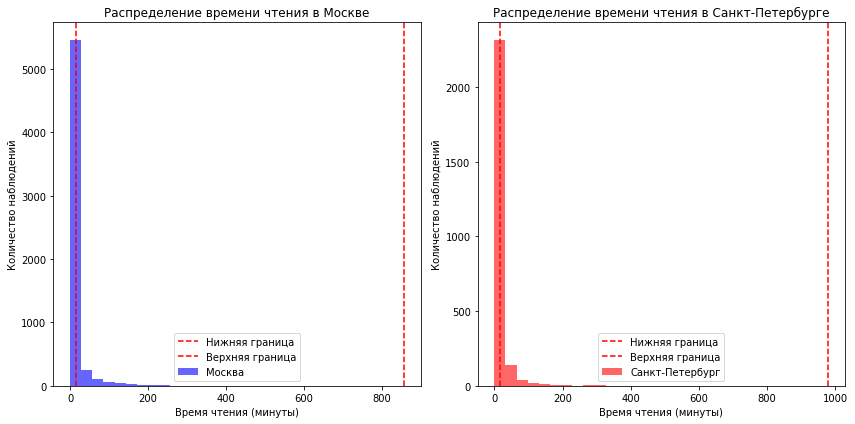

In [14]:
plt.figure(figsize=(12, 6))

# График для Москвы
plt.subplot(1, 2, 1)
plt.hist(moscow, bins=30, alpha=0.6, color='blue', label='Москва')
plt.axvline(moscow_outliers.min(), color='red', linestyle='--', label='Нижняя граница')
plt.axvline(moscow_outliers.max(), color='red', linestyle='--', label='Верхняя граница')
plt.legend()
plt.title('Распределение времени чтения в Москве')
plt.xlabel('Время чтения (минуты)')  # Подпись оси X
plt.ylabel('Количество наблюдений')  # Подпись оси Y

# График для Санкт-Петербурга
plt.subplot(1, 2, 2)
plt.hist(spb, bins=30, alpha=0.6, color='red', label='Санкт-Петербург')
plt.axvline(spb_outliers.min(), color='red', linestyle='--', label='Нижняя граница')
plt.axvline(spb_outliers.max(), color='red', linestyle='--', label='Верхняя граница')
plt.legend()
plt.title('Распределение времени чтения в Санкт-Петербурге')
plt.xlabel('Время чтения (минуты)')  # Подпись оси X
plt.ylabel('Количество наблюдений')  # Подпись оси Y

plt.tight_layout()
plt.show()

Предлагаю отфильтровать и убрать выбросы, дабы они не искажали результаты тестирования. Сосредоточимся на данных между Q1 и Q3, так как они отражают поведение большинства пользователей.

In [15]:
# Создаем функцию для усечения данных
def truncate_data(data, percentile=0.90):
    # Вычисляем значение по заданному процентилю
    threshold = data.quantile(percentile)
    # Усекаем данные
    return data[data <= threshold]

# Сохраняем исходные данные
moscow_original = moscow.copy()
spb_original = spb.copy()

# Усекаем данные
moscow_truncated = truncate_data(moscow)
spb_truncated = truncate_data(spb)

# Проверяем результаты
print("Исходные данные:")
print(f"Москва: {len(moscow_original)} записей")
print(f"СПб: {len(spb_original)} записей")

print("\nПосле усечения:")
print(f"Москва: {len(moscow_truncated)} записей")
print(f"СПб: {len(spb_truncated)} записей")

# Проверяем основные статистики
print("\nСтатистика до усечения:")
print(f"Москва: min={moscow_original.min()}, max={moscow_original.max()}")
print(f"СПб: min={spb_original.min()}, max={spb_original.max()}")

print("\nСтатистика после усечения:")
print(f"Москва: min={moscow_truncated.min()}, max={moscow_truncated.max()}")
print(f"СПб: min={spb_truncated.min()}, max={spb_truncated.max()}")

Исходные данные:
Москва: 5990 записей
СПб: 2550 записей

После усечения:
Москва: 5391 записей
СПб: 2295 записей

Статистика до усечения:
Москва: min=2.19444444444e-05, max=857.2093727777777
СПб: min=2.52777777777e-05, max=978.7647747474748

Статистика после усечения:
Москва: min=2.19444444444e-05, max=24.265254419192328
СПб: min=2.52777777777e-05, max=28.52694444444445


Контрольная группа из Москвы превышает по количеству тестовую группу из Санкт-Петербурга почти в 2.5 раза.

## 2. Проверка гипотезы в Python

Гипотеза звучит так: пользователи из Санкт-Петербурга проводят в среднем больше времени за чтением и прослушиванием книг в приложении, чем пользователи из Москвы. Попробуйте статистически это доказать, используя одностороннюю проверку гипотезы с двумя выборками:

- Нулевая гипотеза H₀:μСПб ≤ μМосква Среднее время активности пользователей в Санкт-Петербурге не больше, чем в Москве.

- Альтернативная гипотеза H₁: μСПб > μМосква  Среднее время активности пользователей в Санкт-Петербурге больше, и это различие статистически значимо.

Алексей, а вот те гипотезы, которые указаны здесь в тетрадке, это не я их формировал, они уже были тут так написаны, я имею ввиду вот эти:
Нулевая гипотеза H₀: Средняя активность пользователей в часах в двух группах (Москва и Санкт-Петербург) не различается.

Альтернативная гипотеза H₁: Средняя активность пользователей в Санкт-Петербурге больше, и это различие статистически значимо.
Я переделал на правильные

In [16]:
from scipy.stats import ttest_ind, levene
import numpy as np
from scipy.stats import t

In [17]:
# Проверка однородности дисперсий
# Формулировка гипотез
H0 = "Дисперсии выборок равны (гомогенны)"
H1 = "Дисперсии выборок не равны (гетерогенны)"

# Проведение теста Левена 
stat, p = stats.levene(spb_truncated, moscow_truncated)

# Вывод результатов
print(f"Нулевая гипотеза (H0): {H0}")
print(f"Альтернативная гипотеза (H1): {H1}")
print(f"Статистика Левена: {stat}")
print(f"p-value Левена: {p}")

# Интерпретация результатов
alpha = 0.05 # Уровень значимости
if p > alpha:
    print("Вывод: Недостаточно оснований отвергнуть нулевую гипотезу")
    print("Заключение: Дисперсии выборок можно считать равными")
else:
    print("Вывод: Отклоняем нулевую гипотезу")
    print("Заключение: Дисперсии выборок статистически значимо различаются")

Нулевая гипотеза (H0): Дисперсии выборок равны (гомогенны)
Альтернативная гипотеза (H1): Дисперсии выборок не равны (гетерогенны)
Статистика Левена: 9.317054280283527
p-value Левена: 0.002278064381441881
Вывод: Отклоняем нулевую гипотезу
Заключение: Дисперсии выборок статистически значимо различаются


In [18]:
# Основной t-тест
alpha = 0.05
result = ttest_ind(spb_truncated, moscow_truncated, equal_var=False, alternative='greater')
print(f"t-статистика: {result.statistic}")
print(f"p-value: {result.pvalue}")

t-статистика: 2.951870112539819
p-value: 0.0015889538839586892


In [19]:
# Интерпретация результатов
if result.pvalue < alpha:
    print("Отклоняем нулевую гипотезу")
else:
    print("Недостаточно оснований отклонить нулевую гипотезу")

Отклоняем нулевую гипотезу


На основе полученных результатов можно сделать следующие выводы:

Тест Левена показывает:
Тест Левена (проверка равенства дисперсий):
Статистика Левена: 9.317
p-value: 0.0023
Значение p-value < 0.05 говорит о том, что дисперсии сравниваемых групп статистически  различаются. 
t-критерий Стьюдента:
t-статистика: 2.952
p-value: 0.0016
Значение p-value говорит о том, что есть статистически значимые различий между сравниваемыми группами. Результат является статистически значимым,  значение p-value < α = 0.05
При уровне значимости 0.05 можно считать результат значимым. Отклоняем нулевую гипотезу


## 3. Аналитическая записка
По результатам анализа данных подготовьте аналитическую записку, в которой опишете:

- Выбранный тип t-теста и уровень статистической значимости.

- Результат теста, или p-value.

- Вывод на основе полученного p-value, то есть интерпретацию результатов.

- Одну или две возможные причины, объясняющие полученные результаты.



Была проведена
- Проверка однородности дисперсий:
Использован тест Левена
Результат: статистика = 9.317 p-value: 0.0023
Вывод: дисперсии не однородны (p < 0.05)
- Тип t-теста:
Двухвыборочный t-тест для независимых выборок (ttest_ind)
Альтернативная гипотеза: односторонний тест (greater)
Уровень значимости (α) = 0.05
- Результаты статистического анализа
Основной t-тест:
t-статистика = 2.952 
p-value = 0.0016
- На основании полученных данных:
p-value (0.0016) находится ниже критического уровня 0.05
Отклоняем нулевую гипотезу
Результат является статистически значимым. При уровне значимости 0.05 можно считать результат значимым.
- Возможные объяснения результатов:
Поддтверждение альтернативной гипотезы, а именно того что среднее время активности пользователей из Санкт-Петербурга выше чем пользователей из Москвы я думаю может быть связано с тем что конечно же Сантк-Петербург это культурная столица и соотвественно там читать будут больше чем в Москве, более развитая культурная инфраструктура способствует более активному чтению и прослушиванию аудио книг.  

# Часть 2. Анализ результатов A/B-тестирования

Теперь вам нужно проанализировать другие данные. Представьте, что к вам обратились представители интернет-магазина BitMotion Kit, в котором продаются геймифицированные товары для тех, кто ведёт здоровый образ жизни. У него есть своя целевая аудитория, даже появились хиты продаж: эспандер со счётчиком и напоминанием, так и подстольный велотренажёр с Bluetooth.

В будущем компания хочет расширить ассортимент товаров. Но перед этим нужно решить одну проблему. Интерфейс онлайн-магазина слишком сложен для пользователей — об этом говорят отзывы.

Чтобы привлечь новых клиентов и увеличить число продаж, владельцы магазина разработали новую версию сайта и протестировали его на части пользователей. По задумке, это решение доказуемо повысит количество пользователей, которые совершат покупку.

Ваша задача — провести оценку результатов A/B-теста. В вашем распоряжении:

* данные о действиях пользователей и распределении их на группы,

* техническое задание.

Оцените корректность проведения теста и проанализируйте его результаты.

## 1. Опишите цели исследования.



Цель: подтвердить или опровергнуть гипотезу о том что упрощение интерфейса приведёт к тому, что в течение семи дней после регистрации в системе конверсия зарегистрированных пользователей в покупателей увеличится как минимум на три процентных пункта.

## 2. Загрузите данные, оцените их целостность.


In [42]:
participants = pd.read_csv('https://code.s3.yandex.net/datasets/ab_test_participants.csv')
events = pd.read_csv('https://code.s3.yandex.net/datasets/ab_test_events.zip',
                     parse_dates=['event_dt'], low_memory=False)

In [43]:
participants.info()
events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14525 entries, 0 to 14524
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   user_id  14525 non-null  object
 1   group    14525 non-null  object
 2   ab_test  14525 non-null  object
 3   device   14525 non-null  object
dtypes: object(4)
memory usage: 454.0+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 787286 entries, 0 to 787285
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   user_id     787286 non-null  object        
 1   event_dt    787286 non-null  datetime64[ns]
 2   event_name  787286 non-null  object        
 3   details     249022 non-null  object        
dtypes: datetime64[ns](1), object(3)
memory usage: 24.0+ MB


In [44]:
# Проверка на пропуски
print("\nПроверка пропусков в participants:")
print(participants.isna().sum())
print("\nПроверка пропусков в events:")
print(events.isna().sum())


Проверка пропусков в participants:
user_id    0
group      0
ab_test    0
device     0
dtype: int64

Проверка пропусков в events:
user_id            0
event_dt           0
event_name         0
details       538264
dtype: int64


Как видно пропуски присутствуют в таблице events в столбце details— дополнительные данные о событии, пропусков достаточно много 538264, но я думаю это вполне объяснимо, так как вполне нормально, что для большинства событий нет никаких дополнительных данных, поэтому с данными пропусками предлагаю ничего не делать. 

In [45]:
# Проверка на дубликаты
print("Проверка дубликатов в participants:")
print(participants.duplicated().sum())
print("\nПроверка дубликатов в events:")
print(events.duplicated().sum())

Проверка дубликатов в participants:
0

Проверка дубликатов в events:
36318


В таблице events достаточно много дубликатов 36318, предлагаю их удалить

In [46]:
events = events.drop_duplicates().reset_index(drop=True)
print("\nПроверка дубликатов в events:")
print(events.duplicated().sum())


Проверка дубликатов в events:
0


Теперь предлагаю проверить неявные дубликаты по user_id

In [47]:
print("\nПроверка дубликатов в таблице участников:")
print(participants.duplicated(subset=['user_id']).sum())
print("\nПроверка дубликатов в таблице событий:")
print(events.duplicated(subset=['user_id']).sum()) 


Проверка дубликатов в таблице участников:
887

Проверка дубликатов в таблице событий:
606784


Как видно в таблице events очень много дубликатов по user_id (606784), в принципе это объяснимо, так как один и тот же пользователь может участвовать в нескольких событиях. А вот дубликатов по user_id в таблице participants быть не должно, так один и тот же пользователь может попасть в разные группы, а это нарушит независимость групп и корректность проводимого тестирования, данные дубликаты удалим в дальнейшем при проверке пересечения.

## 3. По таблице `ab_test_participants` оцените корректность проведения теста:

   3\.1 Выделите пользователей, участвующих в тесте, и проверьте:

   - соответствие требованиям технического задания,

   - равномерность распределения пользователей по группам теста,

   - отсутствие пересечений с конкурирующим тестом (нет пользователей, участвующих одновременно в двух тестовых группах).

In [48]:
# Фильтруем только участников нужного теста
interface_test_participants = participants[participants['ab_test'] == 'interface_eu_test']

In [49]:
# Проверка равномерности распределения
interface_test_participants[interface_test_participants['group'] == 'A']['user_id'].nunique(), interface_test_participants[interface_test_participants['group'] == 'B']['user_id'].nunique()

(5383, 5467)

Между группами не кажется что существует ощутимая разница. Посмотрим, в каком процентном соотношении они находятся:

In [50]:
100 * interface_test_participants[interface_test_participants['group'] == 'A']['user_id'].nunique() / interface_test_participants['user_id'].nunique(), 100 * interface_test_participants[interface_test_participants['group'] == 'B']['user_id'].nunique() / interface_test_participants['user_id'].nunique() 

(49.61290322580645, 50.38709677419355)

Расхождение стало более наглядным — кажется, оно небольшое, его практически нет и им можно пренебречь.

In [52]:
# 1. Подсчет общего количества уникальных пользователей группы B
total_users = participants[participants['group'] == 'B']['user_id'].nunique()
print(f"Общее количество уникальных пользователей: {total_users}")

# 2. Просмотр распределения пользователей по группам и тестам
test_distribution = participants.groupby(['ab_test', 'group']).agg({'user_id': 'nunique'}).reset_index()
print("Распределение пользователей по тестам и группам:")
print(test_distribution)

# 3. Поиск пользователей группы B, попавших в несколько тестов
users_in_multiple_tests = (
    participants[participants['group'] == 'B']  # Фильтруем только группу B
    .groupby('user_id')
    .agg({'ab_test': 'nunique'})
    .reset_index()
    .loc[lambda x: x['ab_test'] > 1]
    ['user_id']
    .unique()
)

# 4. Проверка количества пользователей группы B в нескольких тестах
double_users_in_group_b = users_in_multiple_tests.size

print(f"Количество пользователей группы B в нескольких тестах: {double_users_in_group_b}")

# 5. Создание корректной выборки для нашего теста
clean_sample = participants[
    (participants['ab_test'] == 'interface_eu_test') & 
    ~(participants['user_id'].isin(users_in_multiple_tests))
]

# Проверка результата
print(f"Количество участников в корректной выборке: {len(clean_sample)}")

Общее количество уникальных пользователей: 6279
Распределение пользователей по тестам и группам:
                   ab_test group  user_id
0        interface_eu_test     A     5383
1        interface_eu_test     B     5467
2  recommender_system_test     A     2747
3  recommender_system_test     B      928
Количество пользователей группы B в нескольких тестах: 116
Количество участников в корректной выборке: 10734


In [53]:
# Проверяем пересечения в группах в рамках нашего теста, недопустимо чтобы один и тот же пользователь находился в контрольной и тестовой группе одновременно
a_user = clean_sample[clean_sample['group'] == 'А']['user_id']
b_user = clean_sample[clean_sample['group'] == 'B']['user_id']

intersection = list(set(a_user) & set(b_user))
print(intersection) 

[]


3\.2 Проанализируйте данные о пользовательской активности по таблице `ab_test_events`:

- оставьте только события, связанные с участвующими в изучаемом тесте пользователями;

In [54]:
# Оставляем только события для участников теста
test_users = participants['user_id'].unique()
filtered_events = events[events['user_id'].isin(test_users)]

- определите горизонт анализа: рассчитайте время (лайфтайм) совершения события пользователем после регистрации и оставьте только те события, которые были выполнены в течение первых семи дней с момента регистрации;

In [55]:
# Фильтруем только события регистрации
registration_events = filtered_events[filtered_events['event_name'] == 'registration']

# Создаем столбец registration_dt только для событий регистрации
registration_events['registration_dt'] = registration_events['event_dt']

# Объединяем обратно с основным датафреймом
filtered_events = pd.concat([filtered_events, registration_events['registration_dt']], axis=1)
display(filtered_events)

/tmp/ipykernel_63/2049393128.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  registration_events['registration_dt'] = registration_events['event_dt']


,user_id,event_dt,event_name,details,registration_dt
64143,5F506CEBEDC05D30,2020-12-06 14:10:01,registration,0.0,2020-12-06 14:10:01
64414,51278A006E918D97,2020-12-06 14:37:25,registration,-3.8,2020-12-06 14:37:25
66047,A0C1E8EFAD874D8B,2020-12-06 17:20:22,registration,-3.32,2020-12-06 17:20:22
67326,275A8D6254ACF530,2020-12-06 19:36:54,registration,-0.48,2020-12-06 19:36:54
67382,0B704EB2DC7FCA4B,2020-12-06 19:42:20,registration,0.0,2020-12-06 19:42:20
...,...,...,...,...,...
741249,F80C9BDDEA02E53C,2020-12-30 10:03:51,purchase,4.49,NaT
741250,F80C9BDDEA02E53C,2020-12-30 10:03:52,product_cart,NaN,NaT
741891,6181F3835EBE66BF,2020-12-30 12:10:39,product_cart,NaN,NaT
742121,DD4352CDCF8C3D57,2020-12-30 12:47:46,product_page,NaN,NaT


In [56]:
# Вычисляем разницу между датами в днях
filtered_events['date_diff'] = (filtered_events['event_dt'] - 
                                filtered_events['registration_dt']).dt.days

# Фильтруем записи, где разница находится в диапазоне от 0 до 6 дней
filtered_events = filtered_events[(filtered_events['date_diff'] >= 0) & 
                                 (filtered_events['date_diff'] <= 6)]
display(filtered_events)

,user_id,event_dt,event_name,details,registration_dt,date_diff
64143,5F506CEBEDC05D30,2020-12-06 14:10:01,registration,0.0,2020-12-06 14:10:01,0.0
64414,51278A006E918D97,2020-12-06 14:37:25,registration,-3.8,2020-12-06 14:37:25,0.0
66047,A0C1E8EFAD874D8B,2020-12-06 17:20:22,registration,-3.32,2020-12-06 17:20:22,0.0
67326,275A8D6254ACF530,2020-12-06 19:36:54,registration,-0.48,2020-12-06 19:36:54,0.0
67382,0B704EB2DC7FCA4B,2020-12-06 19:42:20,registration,0.0,2020-12-06 19:42:20,0.0
...,...,...,...,...,...,...
622474,52B5A81EFC31AF1D,2020-12-23 23:44:45,registration,-0.86,2020-12-23 23:44:45,0.0
622475,B1D88FBD4BA58E1B,2020-12-23 23:44:47,registration,0.0,2020-12-23 23:44:47,0.0
622536,38CA3A3C4FE3FEFD,2020-12-23 23:47:47,registration,-1.71,2020-12-23 23:47:47,0.0
622592,16CCB1C8C4DCF1AF,2020-12-23 23:50:29,registration,0.0,2020-12-23 23:50:29,0.0


Оцените достаточность выборки для получения статистически значимых результатов A/B-теста. Заданные параметры:

- базовый показатель конверсии — 30%,

- мощность теста — 80%,

- достоверность теста — 95%.

- ожидаемый прирост — >= 3%.

In [57]:
import numpy as np
from scipy.stats import norm

In [58]:
# Создаем словарь с предопределенными параметрами
DEFAULT_PARAMS = {
    'alpha': 0.05,  # 95% достоверность
    'beta': 0.2,    # 80% мощность
    'effect_size': 0.03,  # 3% ожидаемый прирост
    'base_conversion': 0.3  # 30% базовая конверсия
}

# Функция для получения параметров из словаря
def get_parameters(params_dict):
    return {
        'alpha': params_dict.get('alpha', DEFAULT_PARAMS['alpha']),
        'beta': params_dict.get('beta', DEFAULT_PARAMS['beta']),
        'effect_size': params_dict.get('effect_size', DEFAULT_PARAMS['effect_size']),
        'base_conversion': params_dict.get('base_conversion', DEFAULT_PARAMS['base_conversion'])
    }

def calculate_sample_size(params_dict):
    params = get_parameters(params_dict)
    
    # Константы для заданных уровней значимости и мощности
    Z_alpha_2 = norm.ppf(1 - params['alpha'] / 2)
    Z_beta = norm.ppf(1 - params['beta'])
    
    # Расчет размера выборки
    p = params['base_conversion']
    p1 = p
    p2 = p + params['effect_size']
    
    n = 2 * (Z_alpha_2 * np.sqrt(p * (1 - p)) + 
             Z_beta * np.sqrt(p1 * (1 - p1) + p2 * (1 - p2))) ** 2 / (params['effect_size'] ** 2)
    return int(n)

def calculate_min_detectable_effect(group_size1, group_size2, params_dict):
    params = get_parameters(params_dict)
    
    # Константы для заданных уровней значимости и мощности
    Z_alpha_2 = norm.ppf(1 - params['alpha'] / 2)
    Z_beta = norm.ppf(1 - params['beta'])
    
    # Расчет минимального детектируемого эффекта
    p = params['base_conversion']
    n1 = group_size1
    n2 = group_size2
    
    effect_size = 2 * (Z_alpha_2 * np.sqrt(p * (1 - p) * (1/n1 + 1/n2)) + 
                       Z_beta * np.sqrt(p * (1 - p) * (1/n1 + 1/n2)))
    return effect_size
sample_size = calculate_sample_size(DEFAULT_PARAMS) 
print(f"Необходимый размер выборки: {sample_size}")

min_effect = calculate_min_detectable_effect(5383, 5467, DEFAULT_PARAMS)
print(f"Минимальный детектируемый эффект: {min_effect * 100:.2f}%")



Необходимый размер выборки: 4677
Минимальный детектируемый эффект: 4.93%


In [59]:
from statsmodels.stats.proportion import proportion_effectsize
proportion_effectsize(0.30, 0.33)

-0.06459994854032636

In [60]:
# Расчет требуемого размера выборки
sample_size = calculate_sample_size(DEFAULT_PARAMS)
print(f"Требуемый размер выборки: {sample_size}")

# Фактическое количество участников
actual_size = len(clean_sample)
print(f"Фактическое количество участников: {actual_size}")

Требуемый размер выборки: 4677
Фактическое количество участников: 10734


- рассчитайте для каждой группы количество посетителей, сделавших покупку, и общее количество посетителей.

In [61]:
# Фильтруем события только с покупкой
filtered_events_1 = events[events['user_id'].isin(test_users)]
purchase_events = filtered_events_1[filtered_events_1['event_name'] == 'purchase']

# Подсчитываем количество уникальных покупателей по группам
buyers_per_group = (
    purchase_events
    .merge(participants, on='user_id')
    .groupby('group')['user_id']
    .nunique()
)

# Подсчитываем общее количество посетителей по группам
total_visitors_per_group = participants.groupby('group')['user_id'].nunique()

# Объединяем результаты в одну таблицу
result = pd.DataFrame({
    'group': buyers_per_group.index,
    'buyers_count': buyers_per_group.values,
    'total_visitors': total_visitors_per_group.values
})

# Рассчитываем конверсию
result['conversion_rate'] = result['buyers_count'] / result['total_visitors'] * 100

display(result)

,group,buyers_count,total_visitors,conversion_rate
0,A,2539,7805,32.530429
1,B,2159,6279,34.384456


- сделайте предварительный общий вывод об изменении пользовательской активности в тестовой группе по сравнению с контрольной.

Общее количество посетителей:
- Контрольная группа (A): 7805 посетителей
- Тестовая группа (B): 6279 посетителя

Количество покупателей:
- Контрольная группа: 2539 покупателя
- Тестовая группа: 2159 покупателя

Коэффициент конверсии:
- Контрольная группа: 32.53%
- Тестовая группа: 34.38%

Сравнительный анализ:
- Количество посетителей в тестовой группе меньше на 1526 человека (примерно на 19.56%)
- Количество покупателей в тестовой группе меньше на 380 человека (примерно на 15.4%)
- При этом коэффициент конверсии в тестовой группе выше на 1.85%

Общий вывод: несмотря на значительное снижение общего количества посетителей и покупателей в тестовой группе, эффективность привлечения покупателей (коэффициент конверсии) оказалась выше на 1.85%. Это говорит о том, что изменения, внесенные в тестовую группу, привели к повышению качества трафика - посетители стали более целевыми и склонны к совершению покупок. Но тем не менее желаемого эффекта: повышения на 3% не произошло. Итог: эффект есть, но не тот который ожидался.

## 4. Проведите оценку результатов A/B-тестирования:

- Проверьте изменение конверсии подходящим статистическим тестом, учитывая все этапы проверки гипотез.

In [62]:
import numpy as np
from scipy.stats import norm

Формулировка гипотез:
- H0 (нулевая гипотеза): упрощение интерфейса приводит к увеличению конверсии не более чем на 3%
- H1 (альтернативная гипотеза): упрощение интерфейса приводит к увеличению конверсии более чем на 3% пункта

In [63]:
def prepare_data(result):
    # Фильтрация и группировка данных
    control = result[result['group'] == 'A']
    test = result[result['group'] == 'B']
    
    # Извлечение необходимых метрик
    control_visitors = control['total_visitors'].sum()
    control_buyers = control['buyers_count'].sum()
    control_conv = control_buyers / control_visitors
    
    test_visitors = test['total_visitors'].sum()
    test_buyers = test['buyers_count'].sum()
    test_conv = test_buyers / test_visitors
    
    return {
        'control_visitors': control_visitors,
        'control_buyers': control_buyers,
        'control_conv': control_conv,
        'test_visitors': test_visitors,
        'test_buyers': test_buyers,
        'test_conv': test_conv
    }

def calculate_z_stat(control_conv, test_conv, control_n, test_n, min_diff=0.03):
    # Получаем значения покупателей из словаря данных
    control_buyers = control_n * control_conv
    test_buyers = test_n * test_conv
    
    # Расчет общей конверсии
    p_combined = (control_buyers + test_buyers) / (control_n + test_n)
    
    # Расчет z-статистики
    z_stat = (test_conv - control_conv - min_diff) / np.sqrt(
        p_combined * (1 - p_combined) * (1/control_n + 1/test_n)
    )
    
    # Расчет p-value для одностороннего теста
    p_value = 1 - norm.cdf(z_stat)
    
    return z_stat, p_value

def run_ab_test(result, alpha=0.05):
    # Подготовка данных
    data = prepare_data(result)
    
    # Расчет статистики
    z_stat, p_value = calculate_z_stat(
        data['control_conv'], 
        data['test_conv'], 
        data['control_visitors'], 
        data['test_visitors']
    )
    
    # Вывод результатов
    print(f"Конверсия контрольной группы: {data['control_conv']:.2%}")
    print(f"Конверсия тестовой группы: {data['test_conv']:.2%}")
    print(f"Z-статистика: {z_stat:.2f}")
    print(f"P-value: {p_value:.4f}")
    
    if p_value < alpha:
        print("Гипотеза H0 отвергается. Увеличение конверсии статистически значимо.")
    else:
        print("Гипотеза H0 не отвергается. Статистически значимого увеличения конверсии нет.")



# Вызываем основной метод
run_ab_test(result)



Конверсия контрольной группы: 32.53%
Конверсия тестовой группы: 34.38%
Z-статистика: -1.43
P-value: 0.9242
Гипотеза H0 не отвергается. Статистически значимого увеличения конверсии нет.


- Опишите выводы по проведённой оценке результатов A/B-тестирования. Что можно сказать про результаты A/B-тестирования? Был ли достигнут ожидаемый эффект в изменении конверсии?

Давайте проанализируем полученные результаты A/B-тестирования:
- Разница конверсий:
Группа B показала конверсию на 1.85% выше, чем группа A (34.38% против 32.53%)
Это положительная динамика, так как конверсия увеличилась
- Статистическая значимость:
P-value = 0.9242
Поскольку p-value > 0.05, результаты статистически yt значимы, это означает, что вероятность получить такую разницу случайно очень высока (более 92%)
Z-статистика:
Значение Z = -1.43 показывает, насколько различаются средние значения конверсии между группами в единицах стандартного отклонения. Значение -1.43 указывает на небольшое отклонение.
- Выводы по результатам:
Гипотеза H0 (о том, что нет разницы между группами) не отвергается. Это означает, что статистически значимого увеличения конверсии в тестовой группе по сравнению с контрольной нет. Разница в 1.85% (34.38% - 32.53%) является незначимой с точки зрения статистики.
- Рекомендации:
изменения, внесенные в тестовую группу, не привели к значимому улучшению конверсии, и эти изменения можно считать неэффективными с точки зрения статистического анализа.